# Homework #4

**See Canvas for HW #4 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



## A. Theoretical Problems

## Problem A.1 Causality (15 points)

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

1. In short, the fundamental problem of causal inference is: at most one of two (or many, in a multilevel treatment experiment) potential outcomes can be observed for a given experimental unit, and thus, causal effects cannot be measured directly. This is a problem for a certain way of approaching science and statistics - sometimes called empiricism - that posits that observations drive the generation of knowledge!

2. Because we cannot observe counterfactuals, we cannot measure the response in counterfactual situation. Close substitutes means that we try to measure the response for an individual sufficiently similar to the one in question.

3. A theory about the nature of causality is *deterministic* if the effect *necessarily* follows from the case. On deterministic accounts of causality, object $b$ necessarily moves $y$ meters when struck by object $a$. It would be impossible for $a$ to strike $b$ (at the same speed) and not have $b$ move $y$ meters. A theory about the nature of causality is *probabilistic* if the existence of a cause impacts the probability of an effect. For example, the existence of smoking increases the probability of having cancer.

## Problem A.2 Causal inference and ethics (20 Points)

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, recently [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the ...'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (250-500 words) summarizing this debate. Some importan items to consider:**

1. How does the "fundamental problem of causal inference" present itself in these discussions? 


2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"? (See Lily Hu's blog post for this quote.)


3. What role do assumptions (both statistical and otherwise) play in this debate? To what extent are assumptions made by different researchers falsifiable?

Answers will vary.

## B. Computational Problems

## Problem B.1 (24 Points for STAT 4010, 34 Points for STAT 5010)

#### For the [`teengamb`](https://rdrr.io/cran/faraway/man/teengamb.html) data, fit a model with `gamble` as the response and the other variables as predictors. Look for violations of:

1. Constant Variance (8 points)
2. Normality (8 points)
3. Linearity (8 points)
4. **STAT 5510 Only (10 points): Look for (a) outliers, (b) leverage points, and (b) potentially influential points. This part of the problem requires some self-study about defining and identifying leverage points, and describing the relationship between leverage and influence. Chapter 6 of *Linear Models with R* (pdf on Canvas) may help!**

#### Write a short report detailing your findings.

sex,status,income,verbal,gamble
1,51,2.00,8,0.0
1,28,2.50,8,0.0
1,37,2.00,6,0.0
1,28,7.00,4,7.3
1,65,2.00,8,19.6
1,61,3.47,6,0.1



Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


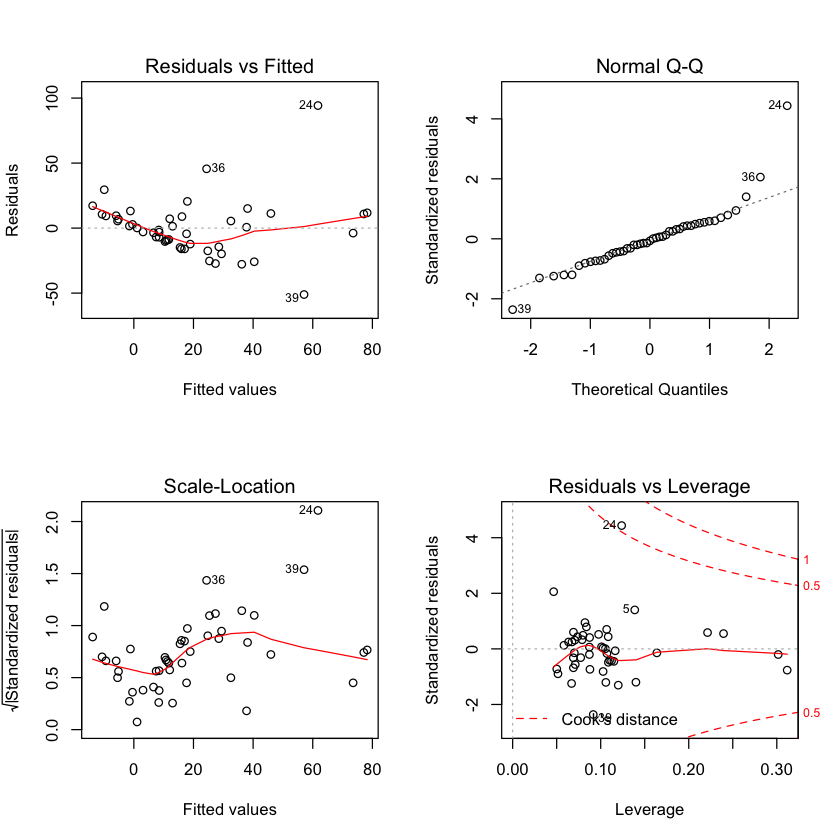

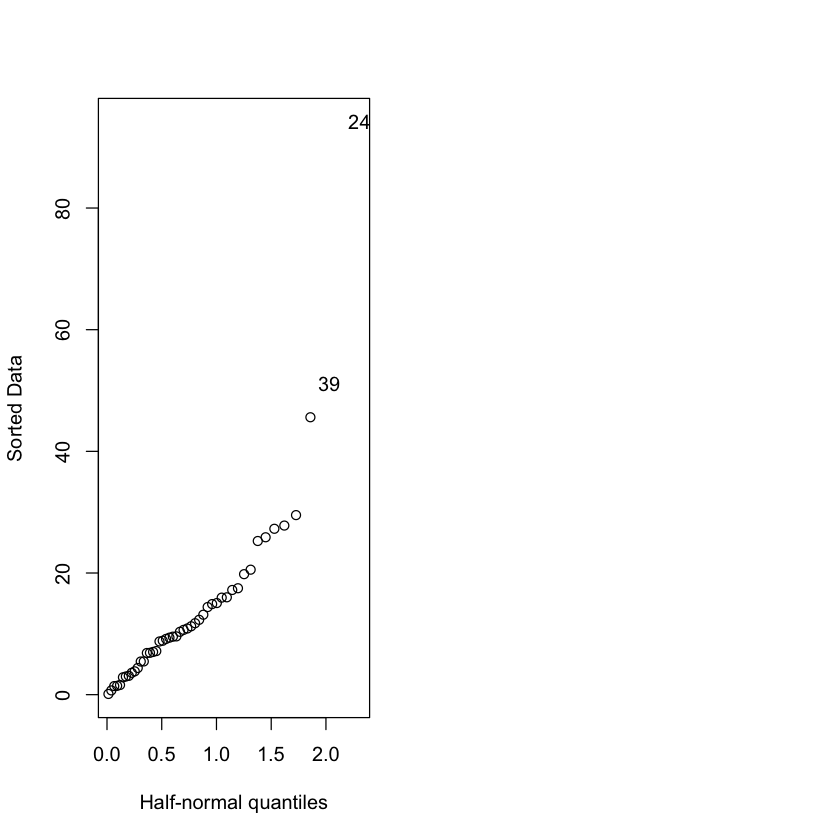

In [1]:
library(faraway) #this package contains the teengamb data. If you have trouble downloading this 
                    #package, you can also find the data on Canvas.
data(teengamb)
head(teengamb)
### BEGIN SOLUTION HERE
lmod2 = lm(gamble ~ ., data = teengamb)
summary(lmod2)

par(mfrow = c(2,2)); plot(lmod2)


par(mfrow = c(1,2)) 
halfnorm(residuals(lmod2)) 
### END SOLUTION HERE

1. Constant Variance: The residual vs. fitted plot provides some evidence that the constant variance assumption is violated. For small fitted values, variability in the residuals is low, but variability increases as the fitted values increase. 
2. Normality: Piints 24, 36, and 39 deviate considerably from the dotted line, suggesting that the data don't come from a normal distribution.
3. Linearity: The residual vs. fitted plot appears to have a linear trend, suggesting that perhaps an additional predictor (or function of an existing predictor) would help better explain systematic varability in the response.
4. **STAT 5510 Only: Look for (a) outliers, (b) leverage points, and (b) potentially influential points.** Points 24 (and maybe 39) may be considered an outlier(s).  Point 24 has a high Cook's distance, which suggests that that point is a leverage point and is potentially influential. We also note that, on a half-normal qq plot of the residuals, point 24 is identified as an outlier (and potentially influential). Below, we remove point 24 from the dataset and notice that the fit (parameters) changes substantially.




Call:
lm(formula = gamble ~ ., data = teengamb2)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.999  -8.102  -0.491   8.600  46.688 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.6306    12.9251   0.590   0.5582    
sex         -16.2986     6.1335  -2.657   0.0112 *  
status        0.1739     0.2083   0.835   0.4088    
income        4.3312     0.7636   5.672 1.26e-06 ***
verbal       -1.8019     1.6137  -1.117   0.2707    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.74 on 41 degrees of freedom
Multiple R-squared:  0.5682,	Adjusted R-squared:  0.526 
F-statistic: 13.49 on 4 and 41 DF,  p-value: 4.225e-07


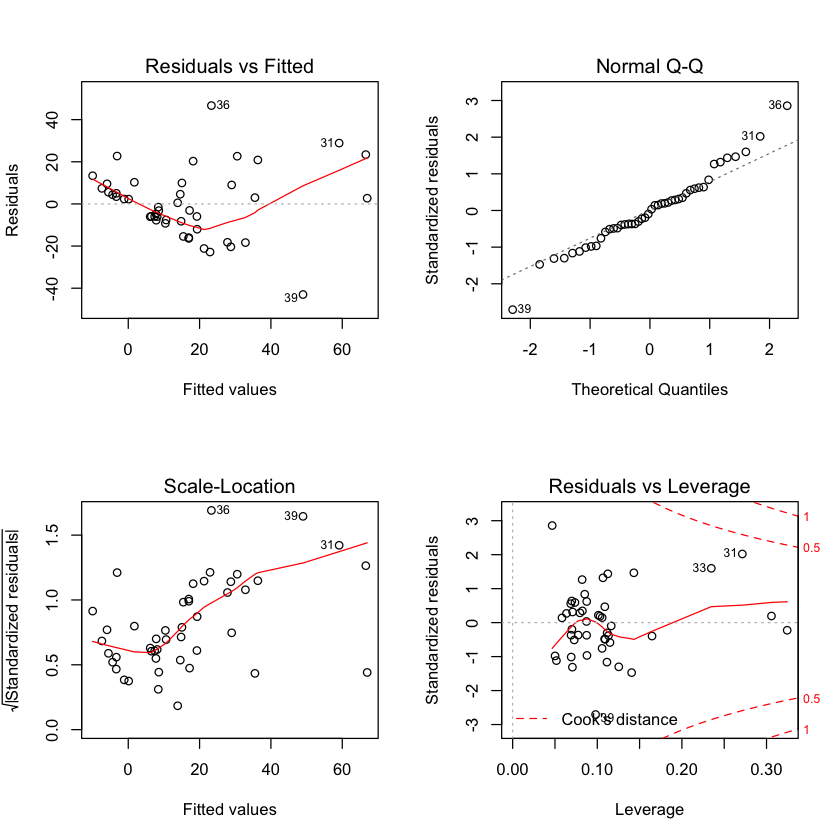

In [2]:
teengamb2 = teengamb[-24,]
lmod3 = lm(gamble ~ ., data = teengamb2)
summary(lmod3)

par(mfrow = c(2,2)); plot(lmod3)

## Problem B.2 (41 Points)

Researchers at the National Institutes of Standards and Technology (NIST) collected [pipline data](https://rdrr.io/cran/faraway/man/pipeline.html) on ultrasonic measurements of the depth of defects in the Alaska pipeline in the field. The depths of the defects were then remeasured in the laboratory. The laboratory measurements are more accurate than the field measurements, but more time consuming and expensive. We want to develop a regression model for correcting the in field measurements. 

#### (a) (10 points) Fit a regression model where `Lab` is the response and `Field` is the predictor and save this model as `lmodPipeline`. Check for non-constant variance. 

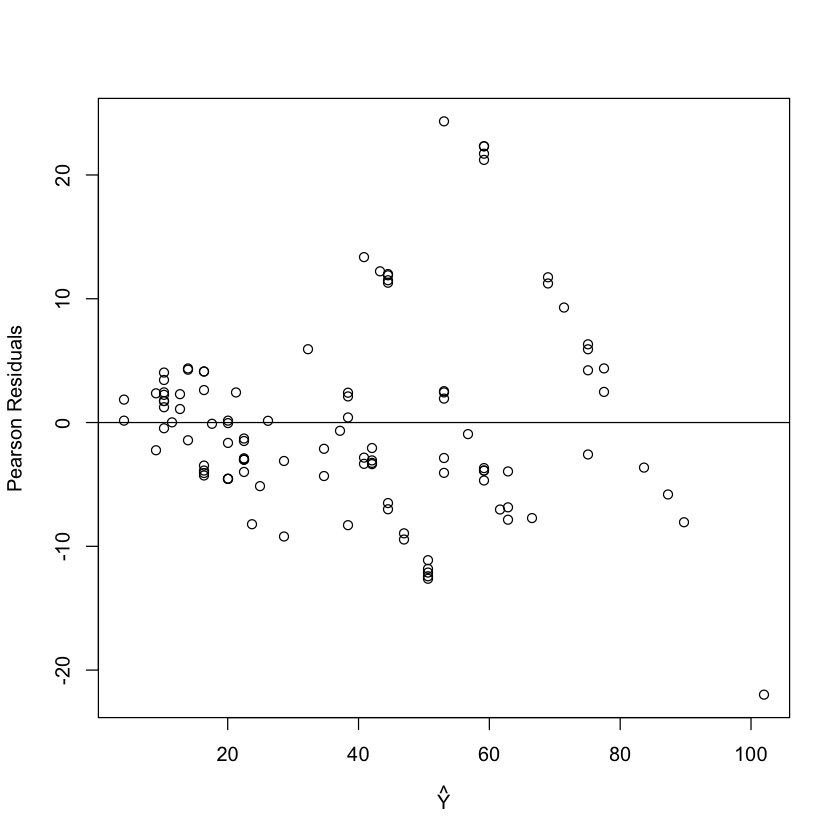

In [3]:
library(faraway) #this package contains the pipeline data. If you have trouble downloading this 
                    #package, you can also find the data on Canvas.
### BEGIN SOLUTION HERE
data(pipeline); 
lmodPipeline = lm(Lab ~ Field, data = pipeline)
plot(fitted(lmodPipeline), resid(lmodPipeline, type = "pearson"), xlab = expression(hat(Y)), ylab = "Pearson Residuals"); abline(0,0)
### END SOLUTION HERE

In [4]:
### BEGIN HIDDEN TESTS
library(testthat)
expect_is(lmodPipeline,"lm")
lmodPipeline_Solution = lm(Lab ~ Field, data = pipeline)
expect_equal(lmodPipeline$coefficients[1][[1]], lmodPipeline_Solution$coefficients[1][[1]])
### END HIDDEN TESTS

The Pearson residuals are a type of standardized residual. A plot of the Pearson residuals against the fitted values provides evidence of nonconstant variance.


#### (b) (10 points) Sometimes transforming the response and predictor helps in stabilizing variance. Find a transformation on Lab and/or Field so that in the transformed scale the relationship is approximately linear with constant variance. Restrict your choice of transformation to square root, log, and inverse. Save your transformed variables as `pipeline$LabTransform` and `pipeline$FieldTransform`. Then, regress the transformed` Lab` variable (repsonse) onto the transformed `Field` variable (predictor), and save this as `lmodTr`.

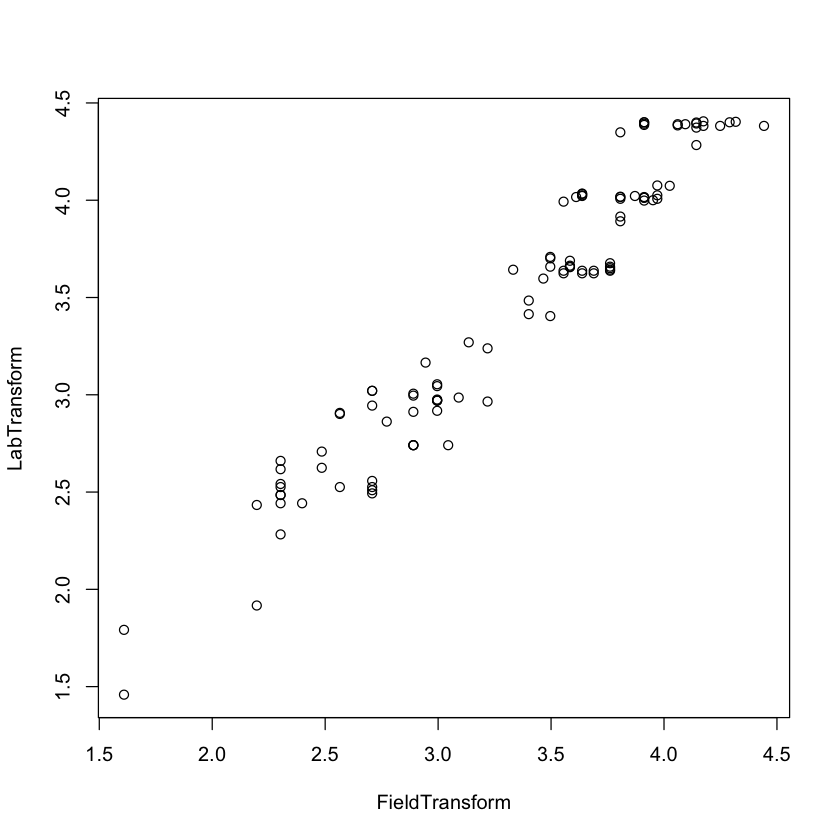

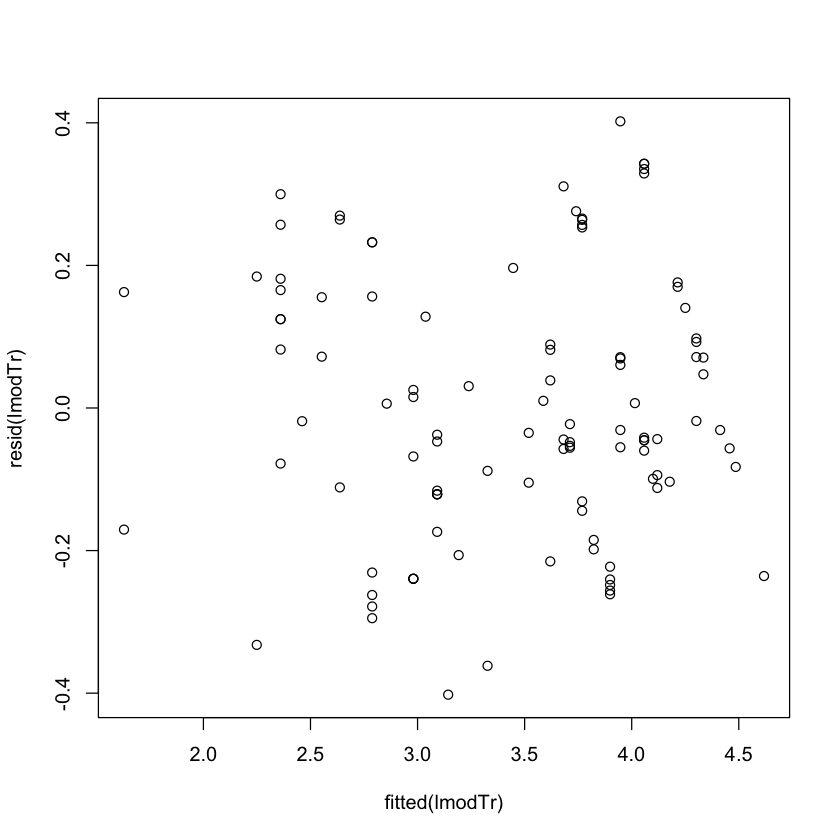

In [5]:
pipeline$LabTransform = log(pipeline$Lab); pipeline$FieldTransform = log(pipeline$Field)
lmodTr = lm(LabTransform ~ FieldTransform, data = pipeline)

with(pipeline, plot(LabTransform ~ FieldTransform))
plot(fitted(lmodTr), resid(lmodTr))

In [6]:
### BEGIN HIDDEN TESTS
library(testthat)
LabTransform_Solution = log(pipeline$Lab); FieldTransform_Solution = log(pipeline$Field)
expect_equal(pipeline$LabTransform ,LabTransform_Solution)
expect_equal(pipeline$FieldTransform, FieldTransform_Solution)

expect_is(lmodTr,"lm")
lmodTr_Solution = lm(LabTransform ~ FieldTransform, data = pipeline)

expect_equal(lmodTr$coefficients[1][[1]], lmodTr_Solution$coefficients[1][[1]])
### END HIDDEN TESTS

#### (c) (5 points) Now let's try weighted least squares. The code below splits the range of `Field` into 12 groups of size nine (except for the last goup which has only eight values). Within each group, we compute the variance of `Lab` as varlab and the mean of `Field` as meanfield. Write comments for each line of the code to demonstrate what each line is doing.

In [7]:
i = order(pipeline$Field); 
npipe = pipeline[i,]; 
ff = gl(12,9)[-108];  
meanfield = unlist(lapply(split(npipe$Field,ff),mean));  
varlab = unlist(lapply(split(npipe$Lab,ff),var)); 

In [8]:
i = order(pipeline$Field); #index of values in order
npipe = pipeline[i,]; #data ordered according to the field variable 
ff = gl(12,9)[-108];  #generates a factor of 12 levels with 9 replications (removing point 108)
meanfield = unlist(lapply(split(npipe$Field,ff),mean));  #mean of the field variable within each of the 12 groups
varlab = unlist(lapply(split(npipe$Lab,ff),var)); #variance of the field variable within each of the 12 groups

#### (d) (16 points) Suppose that the variance in the repsonse is linked to the predictor in the following way: $$ Var(Lab) = a_0Field^{a_1}.$$ Use simple linear regression on (transformations of) varlab and meanfield to estimate $a_0$ and $a_1$. Call this regression `lmodVar`.Use these estimates to perform weighted least squares where the weights are the inverse of the variance of Lab. Call this regression `lmodwls`.  Print a summary of this model and comment on the fit.


Call:
lm(formula = log(varlab[1:12]) ~ log(meanfield[1:12]))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2038 -0.6729  0.1656  0.7205  1.1891 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -0.3538     1.5715  -0.225   0.8264  
log(meanfield[1:12])   1.1244     0.4617   2.435   0.0351 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.018 on 10 degrees of freedom
Multiple R-squared:  0.3723,	Adjusted R-squared:  0.3095 
F-statistic: 5.931 on 1 and 10 DF,  p-value: 0.03513


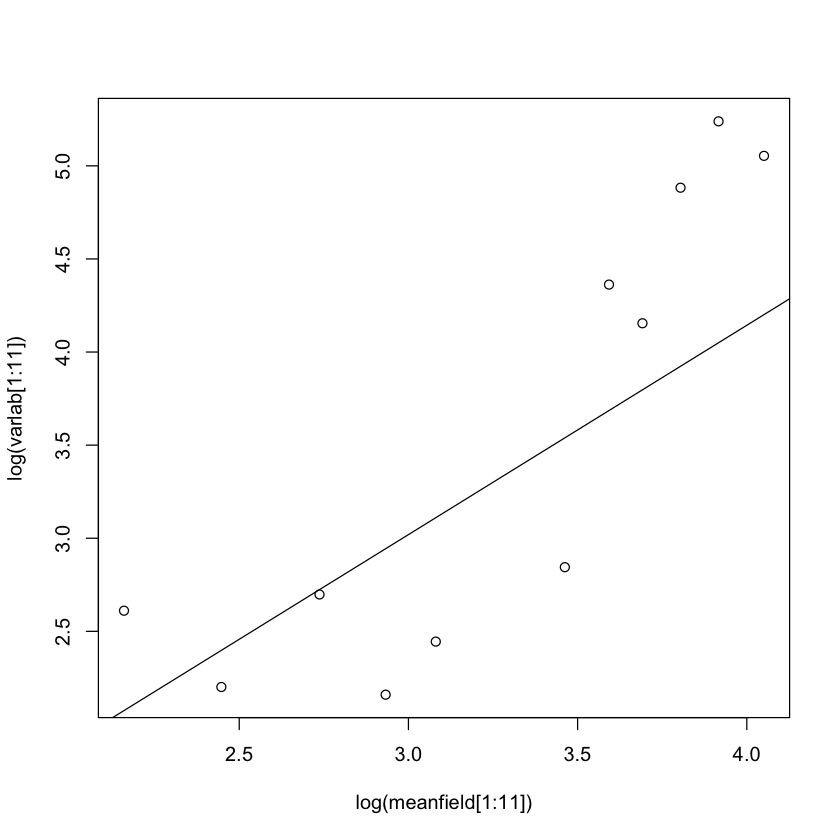

In [9]:
lmodVar = lm(log(varlab[1:12]) ~ log(meanfield[1:12]))
plot(log(meanfield[1:11]),log(varlab[1:11]))
abline(lmodVar)
summary(lmodVar)
a = coef(lmodVar);
w = with(pipeline, exp(a[1])*Field^(a[2])); 

In [10]:
### BEGIN HIDDEN TESTS
library(testthat)
expect_is(lmodPipeline,"lm")
lmodVar_Solution = lm(log(varlab[1:12]) ~ log(meanfield[1:12]))
expect_equal(lmodVar$coefficients[1][[1]], lmodVar_Solution$coefficients[1][[1]])
### END HIDDEN TESTS

In [11]:
lmodwls = lm(Lab ~ Field, data = pipeline, weights = 1/w)
summary(lmodwls)



Call:
lm(formula = Lab ~ Field, data = pipeline, weights = 1/w)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.0826 -0.8102 -0.3189  0.6212  3.4429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.49436    0.90707  -1.647    0.102    
Field        1.20828    0.03488  34.637   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.169 on 105 degrees of freedom
Multiple R-squared:  0.9195,	Adjusted R-squared:  0.9188 
F-statistic:  1200 on 1 and 105 DF,  p-value: < 2.2e-16


In [12]:
### BEGIN HIDDEN TESTS
library(testthat)
expect_is(lmodwls,"lm")
lmodwls_Solution = lmodwls = lm(Lab ~ Field, data = pipeline, weights = 1/w)
expect_equal(lmodwls$coefficients[1][[1]], lmodwls_Solution$coefficients[1][[1]])
### END HIDDEN TESTS

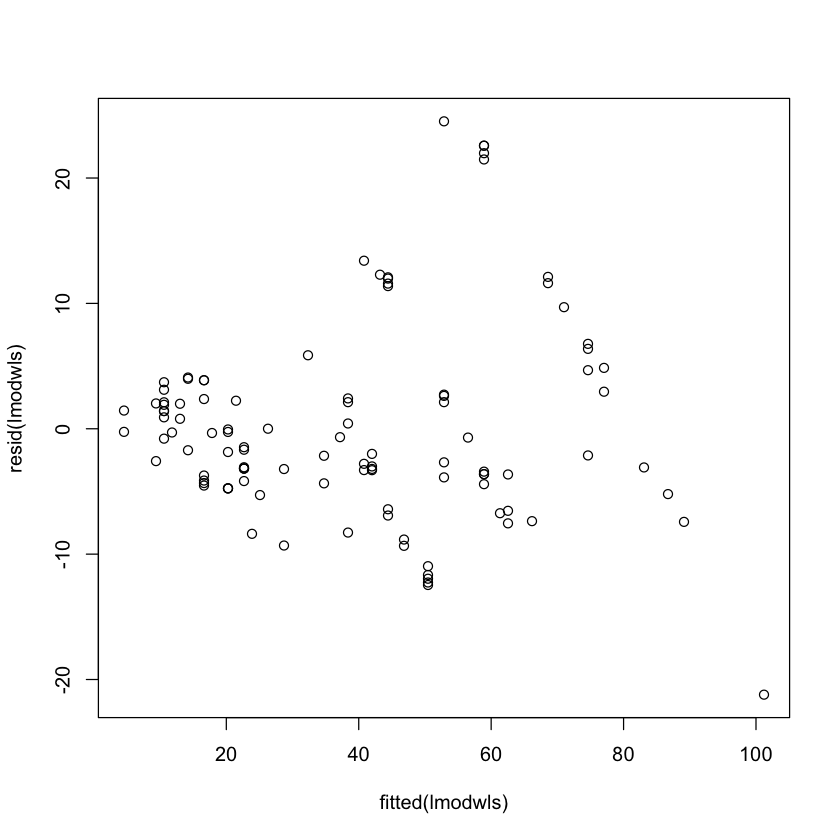

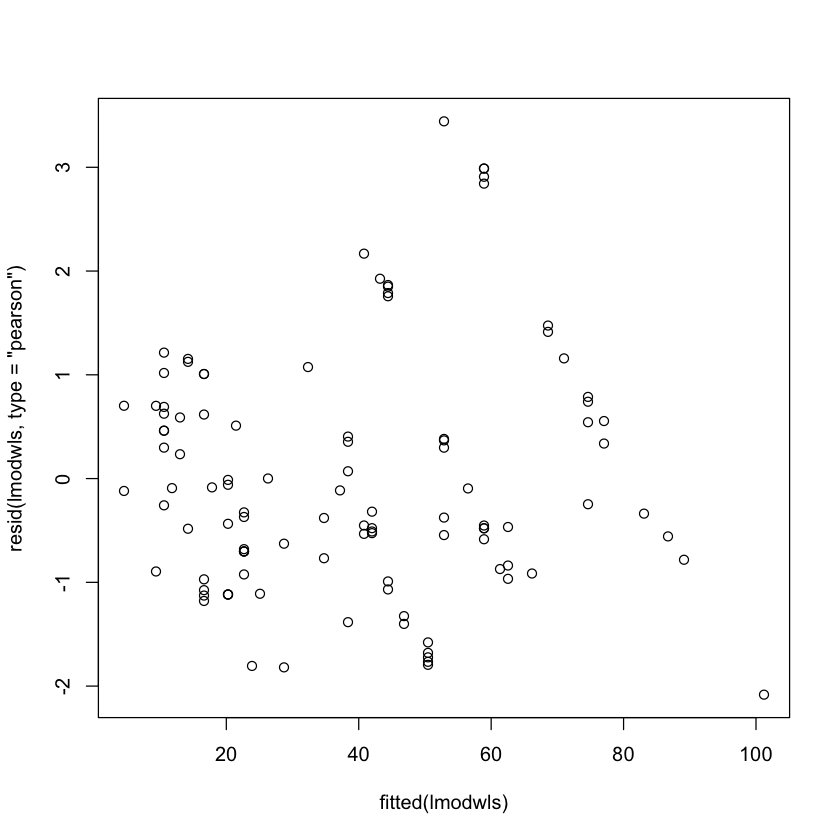

In [13]:
plot(fitted(lmodwls), resid(lmodwls))
plot(fitted(lmodwls), resid(lmodwls, type = "pearson")) #students probably won't use pearson
#residuals, because we didn't talk about them in class. In that case, the residuals will still
#appear to have nonconstant variance.

Using the reguarl residuals, we still see some evidence of nonconstant variance. 

Using the Pearson residuals, which standardizes the redisuals, we see an improvement in fit (no strong evidence of nonconstant variance). 